#Proyecto de Detecci√≥n de Cascos en Motociclistas

#Definici√≥n del Problema
√Årea: Seguridad vial

Problema: Detecci√≥n de motociclistas que no usan casco

Relevancia: El casco reduce significativamente el riesgo de lesiones graves en accidentes de moto. Un sistema autom√°tico de detecci√≥n podr√≠a ayudar en controles de tr√°nsito o sistemas de vigilancia.

Objetivos: Desarrollar un sistema que clasifique im√°genes de motociclistas en "con casco" y "sin casco" usando t√©cnicas de PDI.

#Dise√±o de la Soluci√≥n

Preprocesamiento de im√°genes (redimensionamiento, conversi√≥n a escala de grises)

Extracci√≥n de caracter√≠sticas (usando Histogramas de Gradientes Orientados - HOG) Consiste en descomponer im√°genes en una matriz densa de celdas y calcular un histograma de gradientes para cada celda, que posteriormente se normaliza mediante la superposici√≥n del contraste celular local.

Entrenamiento de un clasificador SVM (M√°quinas de Vectores de Soporte)

Evaluaci√≥n del modelo

Herramientas:

Python

OpenCV (para procesamiento de im√°genes)

Scikit-learn (para el modelo SVM)

Matplotlib (para visualizaci√≥n)

# Paso 1: preparar las im√°genes y etiquetas

Leer las im√°genes

Asignarles la etiqueta correcta

Guardarlas listas para procesar

In [12]:
import cv2
import os
import numpy as np
import glob

# Nuevas rutas
ruta_casco = '/content/drive/MyDrive/TPI_Proyecto_Final/con_casco/*.jpg'
ruta_sin_casco = '/content/drive/MyDrive/TPI_Proyecto_Final/sin_casco/*.jpg'

imagenes = []
etiquetas = []

# Cargar im√°genes CON casco
for ruta in glob.glob(ruta_casco):
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if imagen is not None:
        imagen = cv2.resize(imagen, (128, 128))
        imagenes.append(imagen)
        etiquetas.append(1)  # etiqueta para "con casco"

# Cargar im√°genes SIN casco
for ruta in glob.glob(ruta_sin_casco):
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if imagen is not None:
        imagen = cv2.resize(imagen, (128, 128))
        imagenes.append(imagen)
        etiquetas.append(0)  # etiqueta para "sin casco"

print(f'‚úÖ Se cargaron {len(imagenes)} im√°genes.')



‚úÖ Se cargaron 27 im√°genes.


##Parte 2: extracci√≥n de caracter√≠sticas con HOG
¬øQu√© es HOG?
HOG (Histogram of Oriented Gradients) es una t√©cnica para describir la forma de los objetos en una imagen:

Divide la imagen en peque√±as celdas.

Calcula la direcci√≥n (orientaci√≥n) de los bordes en cada celda.

Usa eso como "firma" del objeto.

In [13]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Paso 1: convertimos cada imagen a su descriptor HOG
hog_features = []

for imagen in imagenes:
    # Extraemos las caracter√≠sticas HOG de la imagen
    features = hog(imagen, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), block_norm='L2-Hys')

    hog_features.append(features)

# Convertimos a array para poder usarlo en sklearn
X = np.array(hog_features)
y = np.array(etiquetas)

# Paso 2: dividimos en entrenamiento y prueba (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: entrenamos el clasificador SVM
modelo = LinearSVC()
modelo.fit(X_train, y_train)

# Paso 4: probamos con el conjunto de prueba
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"‚úÖ Precisi√≥n del modelo: {accuracy * 100:.2f}%")


‚úÖ Precisi√≥n del modelo: 83.33%


#Paso 3: Probar con una imagen nueva
Vamos a cargar una imagen, procesarla, extraer sus caracter√≠sticas HOG, y hacer que el modelo prediga si la persona tiene casco o no.

In [33]:
# Eleg√≠ la imagen que quer√©s probar
nombre_imagen_prueba = "moto17.jpg"  # cambi√° esto si quer√©s otra

# Ruta a la imagen
carpeta_imagenes = "/content/drive/MyDrive/TPI_Proyecto_Final/sin_casco"
nombre_imagen_prueba = "moto17.jpg"
ruta_prueba = os.path.join(carpeta_imagenes, nombre_imagen_prueba)

# Cargamos y procesamos
imagen_prueba = cv2.imread(ruta_prueba, cv2.IMREAD_GRAYSCALE)

if imagen_prueba is None:
    print("‚ùå No se pudo cargar la imagen.")
else:
    # Redimensionamos igual que antes
    imagen_prueba = cv2.resize(imagen_prueba, (128, 128))

    # Extraemos HOG
    features_prueba = hog(imagen_prueba, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys')

    # Predecimos
    prediccion = modelo.predict([features_prueba])[0]

    # Mostramos resultado
    texto_resultado = "‚úÖ CON casco" if prediccion == 1 else "‚ùå SIN casco"
    print(f"La imagen {nombre_imagen_prueba} fue clasificada como: {texto_resultado}")


La imagen moto17.jpg fue clasificada como: ‚ùå SIN casco


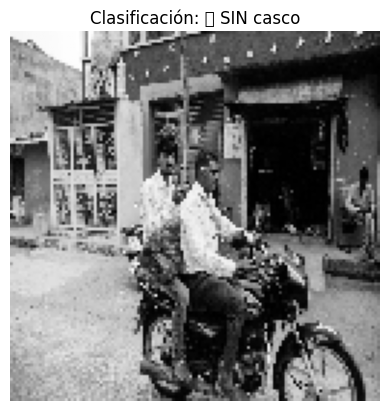

In [34]:
import matplotlib.pyplot as plt

# Mostrar la imagen con el resultado
plt.imshow(imagen_prueba, cmap='gray')
plt.title(f"Clasificaci√≥n: {texto_resultado}")
plt.axis('off')
plt.show()


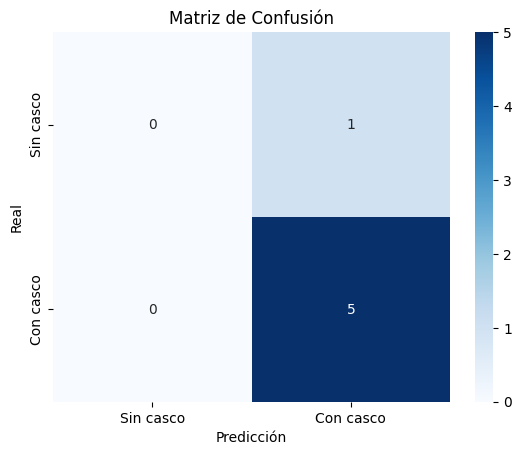

üìã Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

   Sin casco       0.00      0.00      0.00         1
   Con casco       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sin casco", "Con casco"], yticklabels=["Sin casco", "Con casco"])
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=["Sin casco", "Con casco"]))


In [18]:
import joblib

# Guardar modelo
joblib.dump(modelo, "modelo_svm_cascos.pkl")
print("üíæ Modelo guardado como modelo_svm_cascos.pkl")


üíæ Modelo guardado como modelo_svm_cascos.pkl


In [ ]:
"""modelo_cargado = joblib.load("modelo_svm_cascos.pkl")"""


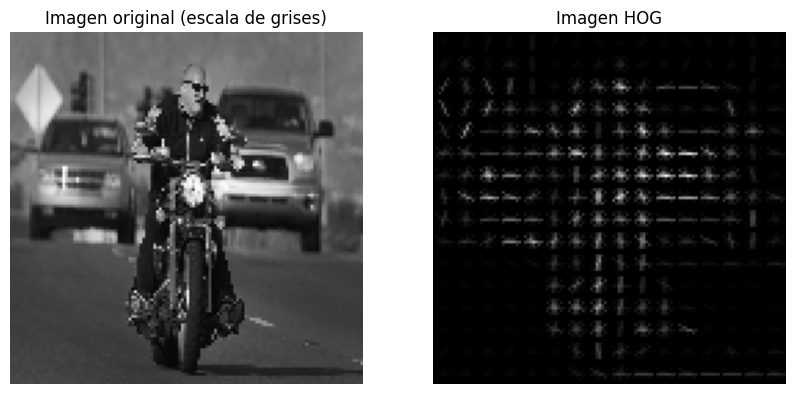

In [28]:
from skimage import color, exposure
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the image directly as grayscale
imagen_ejemplo_path = "/content/drive/MyDrive/TPI_Proyecto_Final/test_nuevas/moto28.jpg"
imagen_gris = cv2.imread(imagen_ejemplo_path, cv2.IMREAD_GRAYSCALE)

if imagen_gris is not None:
    # Resize the image to match the training data size
    imagen_gris_resized = cv2.resize(imagen_gris, (128, 128))

    # Extract HOG features and the HOG image
    hog_features, hog_image = hog(imagen_gris_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # Display the original grayscale image
    plt.imshow(imagen_gris_resized, cmap='gray')
    plt.title("Imagen original (escala de grises)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap="gray")
    plt.title("Imagen HOG")
    plt.axis('off')
    plt.show()
else:
    print("Error: No se pudo cargar la imagen de ejemplo.")

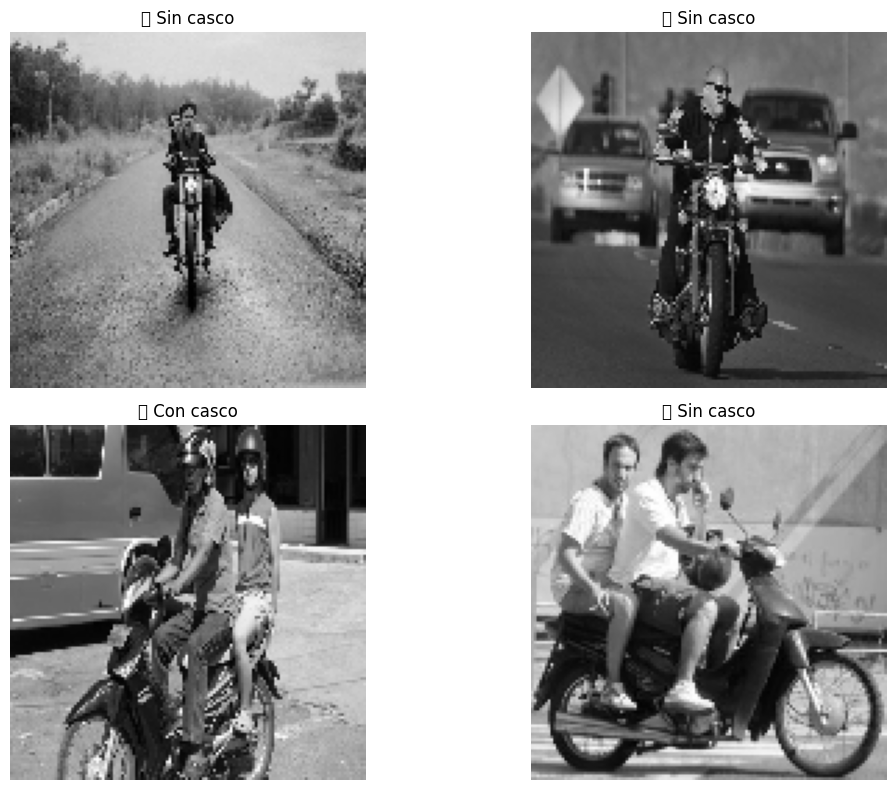

In [31]:
from glob import glob

# Buscar todas las im√°genes en carpeta test_nuevas
carpeta_test = "/content/drive/MyDrive/TPI_Proyecto_Final/test_nuevas/"
imagenes_test = glob(os.path.join(carpeta_test, "*.jpg"))

# Mostrar hasta 4 predicciones
plt.figure(figsize=(12, 8))
for i, ruta in enumerate(imagenes_test[:4]):
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    imagen = cv2.resize(imagen, (128, 128))
    features = hog(imagen, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), block_norm='L2-Hys')

    pred = modelo.predict([features])[0]
    etiqueta = "‚úÖ Con casco" if pred == 1 else "‚ùå Sin casco"

    plt.subplot(2, 2, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.tight_layout()
plt.show()
